Load the Standard Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)
from sklearn.metrics import silhouette_score

Load the Dataset

In [3]:
df=pd.read_excel('cust_data.xlsx')

Audit the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

Imputing Missing values of gender column

In [5]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [6]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,0.140133,0.328200,0.209333,0.141467,0.161100,0.106100,0.300233,0.048067,0.754800,0.247900,0.470833,0.258000,0.118767,0.031967,0.428033,0.121333,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,0.471278,0.807655,1.116820,0.529210,0.604835,0.516512,1.119167,0.338763,1.262166,0.724106,1.346159,0.848288,0.597612,0.264475,1.098876,0.478977,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Jordan', ylabel='count'>

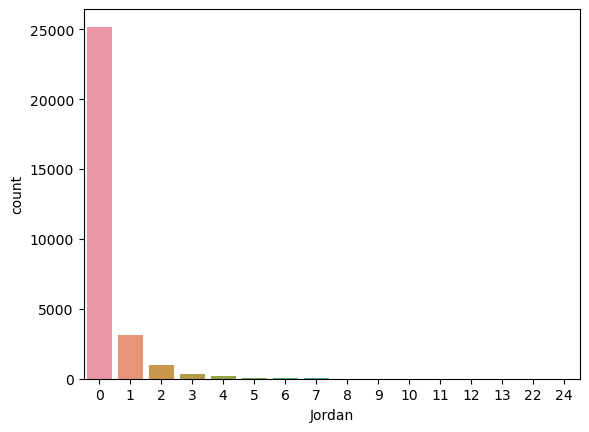

In [7]:
sns.countplot(df['Jordan'])

Enconde the Gender Varaible

In [8]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Gender'].value_counts()

0    24778
1     5222
Name: Gender, dtype: int64

Dropping Cust_ID as this is an unwanted column

In [9]:
df.drop(['Cust_ID'],axis=1,inplace=True)

<AxesSubplot:>

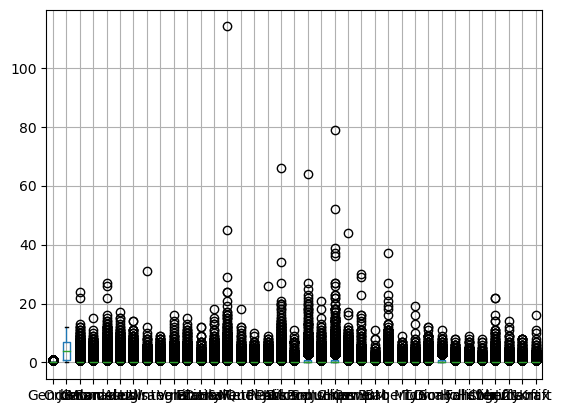

In [10]:
df.boxplot()

In [16]:
wcss=[]
for i in range(1,21):
    kn=KMeans(n_clusters=i)
    kn.fit(df)
    wcss.append(kn.inertia_)
print(wcss)

[922806.4653666655, 620898.7650530624, 572554.5446585139, 547370.1854614178, 527577.4221609904, 511498.2713697104, 496830.609038693, 484982.5398608239, 476494.1639304159, 466308.8681752997, 459082.17694855115, 449228.2168521189, 444538.2551317929, 436436.00926354615, 430684.9069271759, 425155.1230223688, 418297.2063566903, 414580.75436559564, 410511.5559152952, 405855.0283986301]


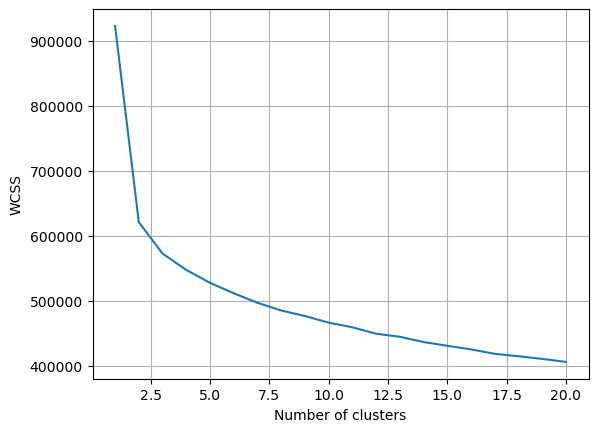

In [20]:
plt.plot(range(1,21),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [16]:
df['Cluster']=kmeans.labels_

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

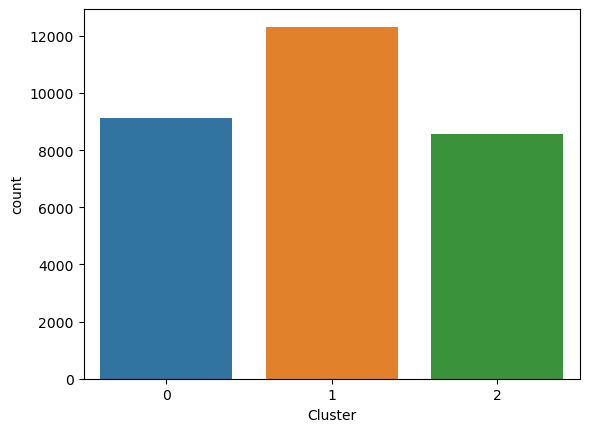

In [17]:
sns.countplot(df['Cluster'])

In [18]:
print(silhouette_score(df.iloc[:,0:-1],labels=df['Cluster']))

0.20423577841504406


In [32]:
df.groupby(by=df['Cluster'])['Orders'].sum()

Cluster
0    35740
1      854
2    62715
3     2521
4     1771
5    18910
6     2583
Name: Orders, dtype: int64

In [33]:
pd.crosstab(df['Cluster'],df['Gender'])

Gender,0,1
Cluster,,
0,4848,1068
1,176,46
2,5489,1242
3,704,50
4,294,88
5,5247,1138
6,8020,1590
